In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r'C:\Users\hp\OneDrive\Documents\DATA SCIENCE\PYTHON FILES\Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Categorical VS Categorical** 

In [2]:
# continent
# case_status
# as we know that there are 25480 observations are there
# in that 16k are from asia applicants
# out of 16k applicants how many visa certified
# out of 16k applicants how many visa denied

In [3]:
c1 = visa_df['continent']=='Asia'
c2 = visa_df['case_status']=='Certified'
c3 = visa_df['case_status']=='Denied'
con = c1 & c2
con_d = c1 & c3
cer_count = len(visa_df[con])
den_count = len(visa_df[con_d])

print(f"There are {cer_count} got certified visa from Asia")
print(f"There are {den_count} got denied visa from Asia")

There are 11012 got certified visa from Asia
There are 5849 got denied visa from Asia


In [4]:
unique=visa_df['continent'].unique()
certified=[]
denied=[]
cols=['continents','Certified','Denied']
for i in unique:
    c1 = visa_df['continent']==i
    c2 = visa_df['case_status']=='Certified'
    c3 = visa_df['case_status']=='Denied'
    
    cer_con = c1 & c2
    den_con = c1 & c3
    
    certified.append(len(visa_df[cer_con]))
    denied.append(len(visa_df[den_con]))

d1=pd.DataFrame(zip(unique,certified,denied),
             columns=cols)
d1.set_index('continents')

,Certified,Denied
continents,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [5]:
d1.set_index('continents')

,Certified,Denied
continents,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**pd.crosstab**
- will take two arguments
    - index
    - column

In [6]:
col2=visa_df['case_status']
col1=visa_df['continent']
pd.crosstab(col1,col2)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [7]:
col1=[visa_df['continent'],visa_df['education_of_employee']]
col2=visa_df['case_status']
result_1=pd.crosstab(col1,col2)
result_1

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

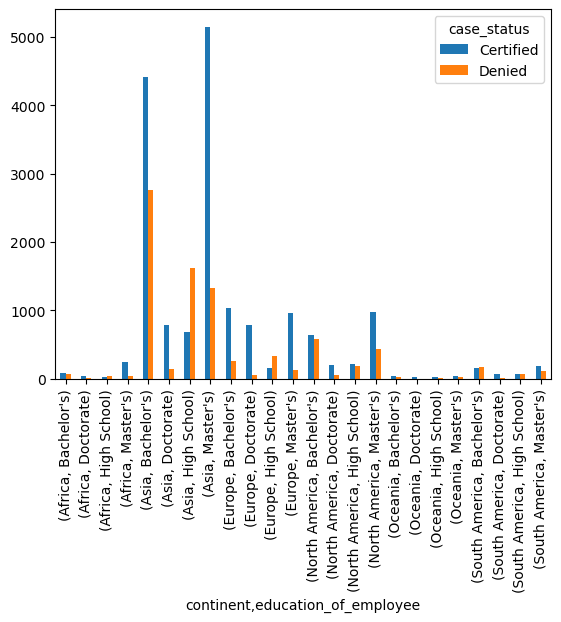

In [8]:
result_1.plot(kind='bar')

In [9]:
col1=[visa_df['continent'],visa_df['education_of_employee']]
col2=visa_df['case_status']
result_2=pd.crosstab(col2,col1)
result_2

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

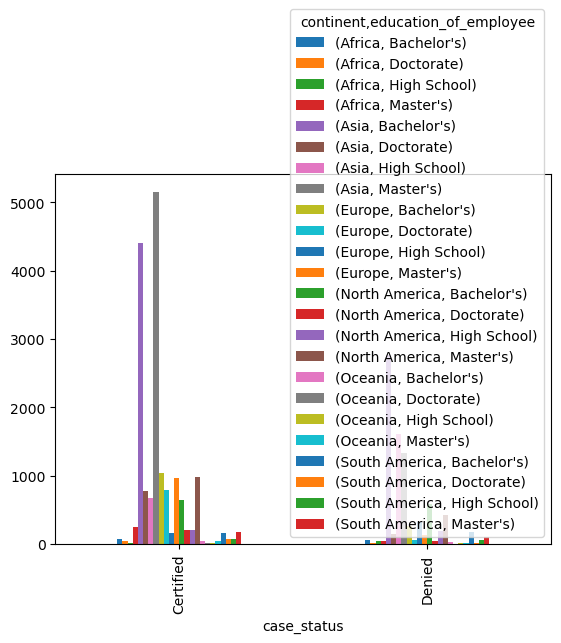

In [10]:
result_2.plot(kind='bar')
plt.show()

In [11]:
col1=visa_df['continent']
col2=[visa_df['case_status'],visa_df['education_of_employee']]
result_3=pd.crosstab(col2,col1)
result_3

continent                          Africa  Asia  Europe  North America  \
case_status education_of_employee                                        
Certified   Bachelor's                 81  4407    1040            641   
            Doctorate                  43   780     788            207   
            High School                23   676     162            210   
            Master's                  250  5149     967            979   
Denied      Bachelor's                 62  2761     259            584   
            Doctorate                  11   143      58             51   
            High School                43  1614     328            191   
            Master's                   38  1331     130            429   

continent                          Oceania  South America  
case_status education_of_employee                          
Certified   Bachelor's                  38            160  
            Doctorate                   19             75  
            High School                 19             74  
            Master's                    46            184  
Denied      Bachelor's                  28            173  
            Doctorate                    3             14  
            High School                 17             63  
            Master's                    22            109

<Axes: xlabel='case_status,education_of_employee'>

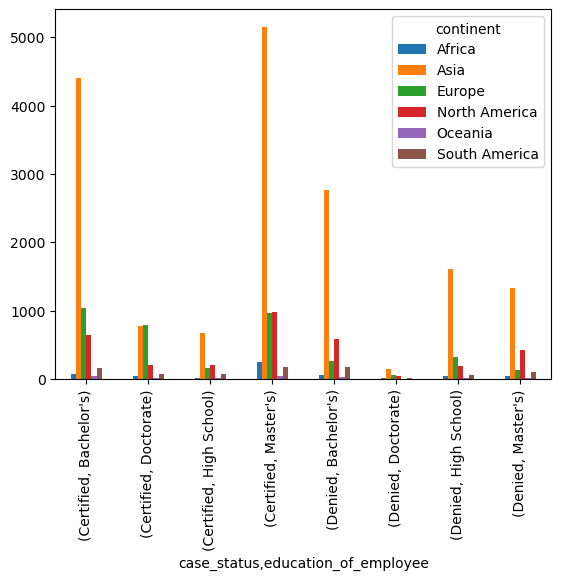

In [12]:
result_3.plot(kind='bar')

In [13]:
col1=visa_df['continent']
col2=[visa_df['case_status'],visa_df['education_of_employee']]
result_4=pd.crosstab(col1,col2)
result_4

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

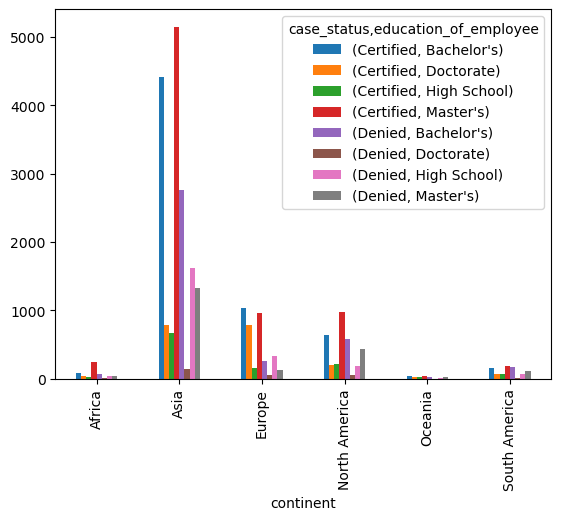

In [14]:
result_4.plot(kind='bar')

**plt.scatter**

<img decoding="async" class="alignnone size-full wp-image-12785" src="https://www.aplustopper.com/wp-content/uploads/2016/12/scatter-plots-correlation-1.gif" alt="" width="600" height="480">

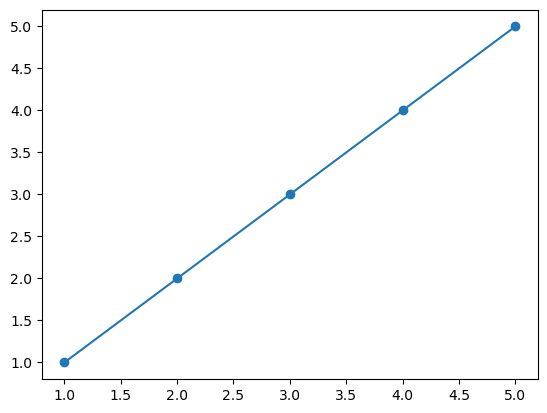

In [15]:
#LINE EQUATION
x=[1,2,3,4,5]
y=[1,2,3,4,5]

plt.scatter(x,y)
plt.plot(x,y)
plt.show()

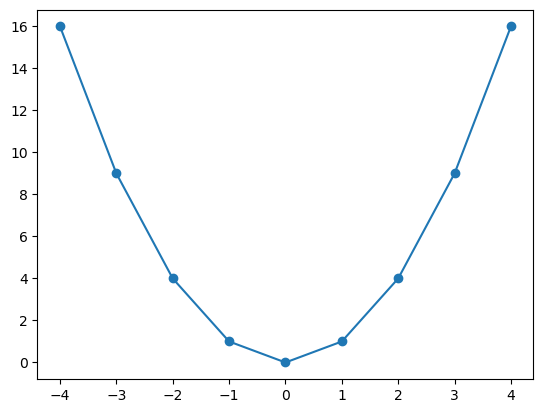

In [16]:
#PARABOLA
x=[i for i in range(-4,5)]
y=[i*i for i in x]

plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [17]:
# EXTRACT ONLY NUMERICAL COLUMNS

num_cols=visa_df.select_dtypes(exclude='object')
num_cols.columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

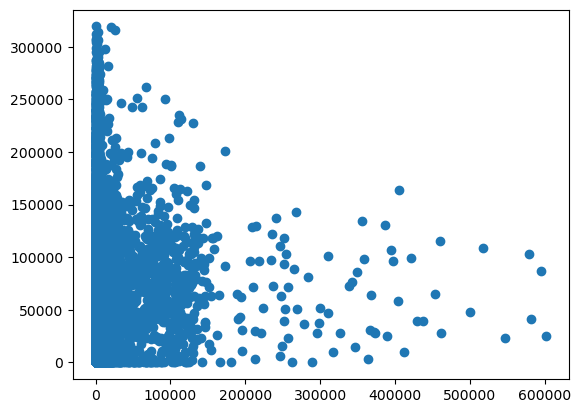

In [18]:
col1=[visa_df['no_of_employees']]
col2=[visa_df['prevailing_wage']]
plt.scatter(col1,col2)
plt.show()      #NO RELATION

**Pearson Correlation Coefficient**
- r varies from -1 to 1
- -1 to 0 : Negative relation
- 0 to 1: Postive relation
- 0: No relation

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="17" data-atf="0">

- when you do this python
- It gives the matrix
- in Visa data we have 3 numerical columns are there
- python will give a matrix w.r.t 3 numerical columns
- The values in each field tells about the relation between the variables

In [19]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


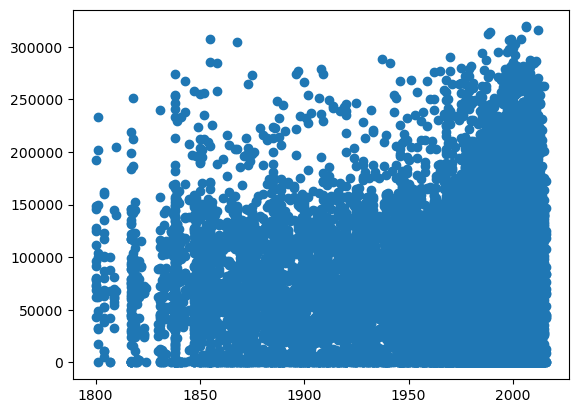

In [20]:
col1=[visa_df['yr_of_estab']]
col2=[visa_df['prevailing_wage']]
plt.scatter(col1,col2)
plt.show()

In [21]:
path = r'C:\Users\hp\OneDrive\Documents\DATA SCIENCE\PYTHON FILES\winequality_red.csv'
wine_data=pd.read_csv(path)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
wine_data.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [23]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**positive corelation**

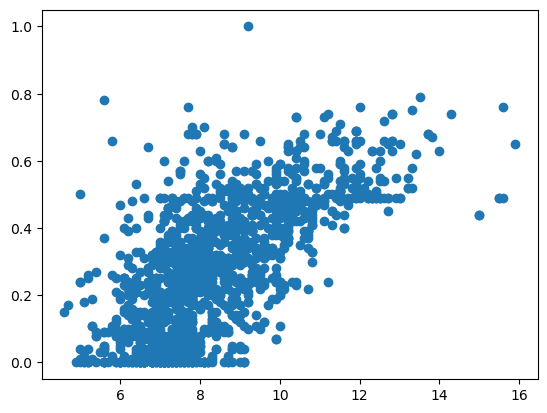

In [24]:
#'fixed acidity' and 'citric acid' : 0.67 +ve 

col1=[wine_data['fixed acidity']]
col2=[wine_data['citric acid']]
plt.scatter(col1,col2)
plt.show()

**negative corelation**

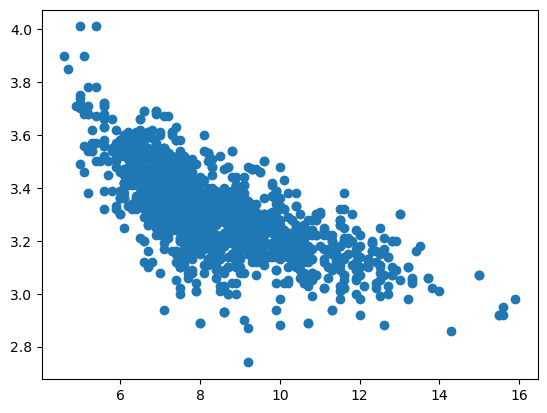

In [25]:
col1=[wine_data['fixed acidity']]
col2=[wine_data['pH']]
plt.scatter(col1,col2)
plt.show()

**strong positive corelation**

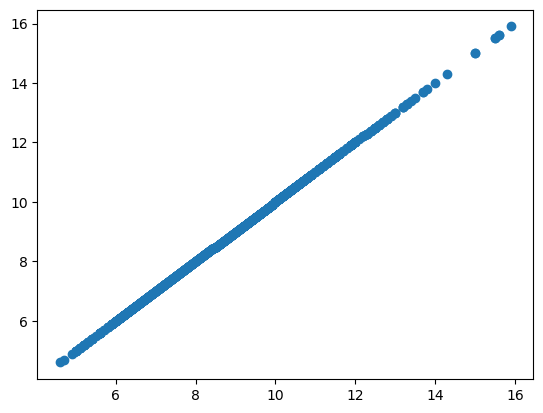

In [26]:
col1=[wine_data['fixed acidity']]
col2=[wine_data['fixed acidity']]
plt.scatter(col1,col2)
plt.show()

$HEAT-MAP$

- Heat map is useful to visulization of matrix
- It is under seaborn pacakges
- Heat map will varies the values and gives the color about the values

In [27]:
#THIS IS A MATRIX NOW APPLY HEAT MAP

corr_visa=visa_df.corr(numeric_only=True)
corr_visa

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


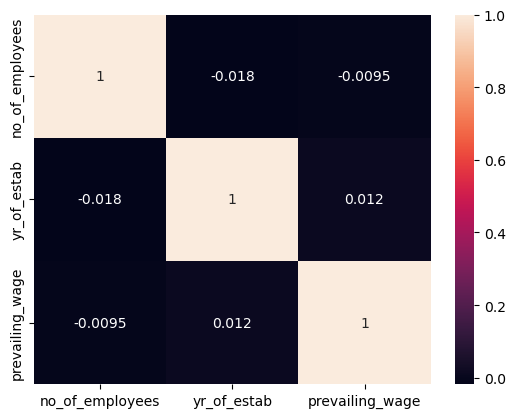

In [28]:
sns.heatmap(corr_visa,
            annot=True)
plt.show()

In [29]:
wine_corr=wine_data.corr(numeric_only=True)
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


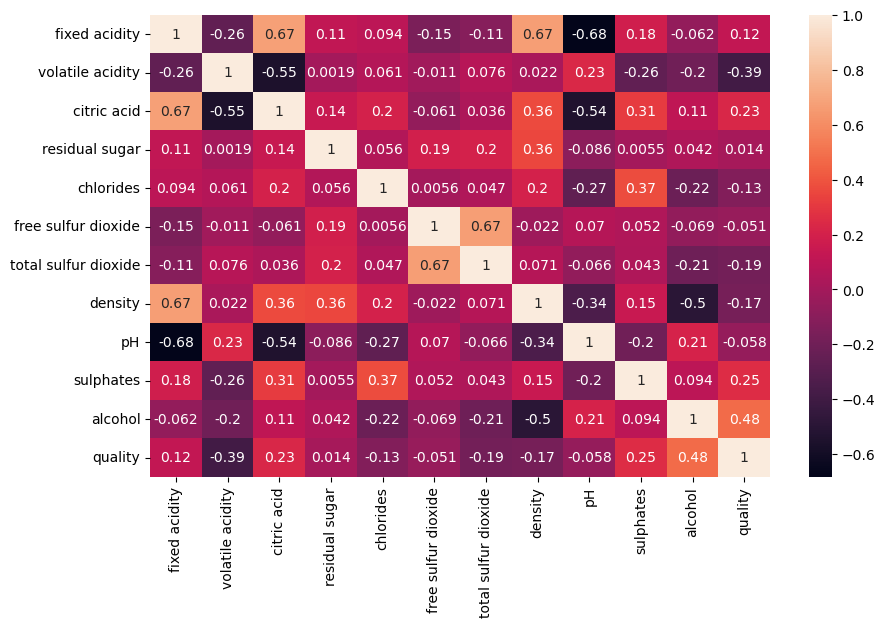

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,
            annot=True)
plt.show()